In [1]:
# set-up -- do not change
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
np.random.seed(1)

# Question 1.1 (5 pts)

> This question is about performing Bayesian inference in an "everyday" scenario, with some simplifying assumptions. Related material was covered in Week 1 of the course.


You are one of 80 passengers waiting for your bag at an airport luggage carousel (see Section 2.5 of \[**MKG23**\]). We assume each passenger has one and only one bag. In general, your bag looks the same as 6% of all bags. In formulas:
$$
p(\text{looks like your bag}|\text{it is your bag}) = 1, \qquad p(\text{looks like your bag}|\text{it is not your bag}) = 0.06.
$$

Derive a general expression for the probability that the bag you are viewing (which matches your bag visually) is your own, $$p(\text{it is your bag} | \text{looks like your bag}),$$ 
as a function of the number of bags $b$ you have viewed so far (before the current one). 

- a) What is $p(\text{it is your bag} | \text{looks like your bag})$ after 40 bags have gone by, none of which was yours (that is, $b = 40$)?
- b) How many bags must you view (without finding your own) before the posterior probability $p(\text{it is your bag}|\text{looks like your bag})$ is equal or greater than 70%?

Report your results in Moodle.

a): The probability that the next bag (which looks like your bag) is actually your bag is approximately 0.299401197604790 or 29.940119760479046%.
b): The passenger must view 72 bags before the posterior probability 𝑝(it is your bag|looks like your bag) is equal or greater than 70%.
Prior probabilities


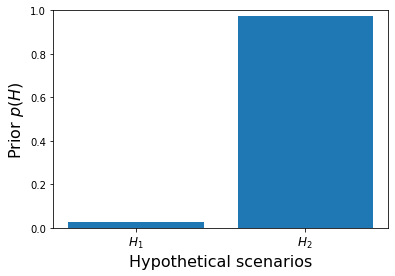

Likelihood function


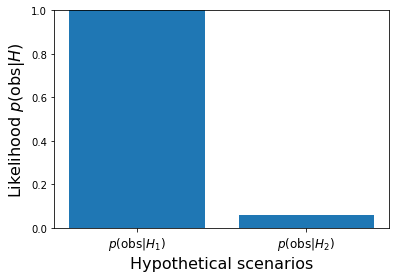

Posterior


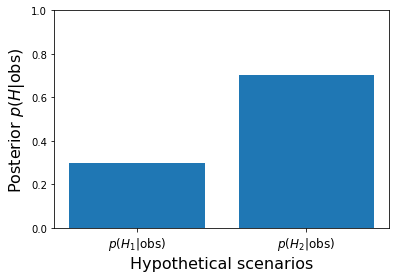

In [2]:
# code here... 

# A function for calculating the posterior.
def calculate_probability(b):
    
    """
    Parameters:
    b(int): Number of bags you have viewed so far.
    Let's define A as the event “it is your bag” and B as the event “looks like your bag”.
    So 𝑝(looks like your bag|it is your bag)= 1 is p(B|A) and 
    𝑝(looks like your bag|it is not your bag)= 0.06 is p(B|¬A)
    """
    # Prior probabilities
    p_A = 1 / (80 - b)
    p_not_A = 1 - p_A
    
    # Likelihoods
    p_B_given_A = 1
    p_B_given_not_A = 0.06
    # Calculate posterior probability using Bayes' theorem
    p_A_given_B = (p_B_given_A * p_A) / (p_B_given_A * p_A + p_B_given_not_A * p_not_A)

    return p_A_given_B

# a):
# Defining the parameter of the Function.
b = 40
# Calculate posterior probability using the function
probability = calculate_probability(b)
print("a): The probability that the next bag (which looks like your bag) is actually your bag is approximately {:.15f} or {:.15f}%.".format(probability, probability*100))

###########################################################


# b):
threshold = 0.7 

for b in range(80):
    p_A_given_B = calculate_probability(b)
    if p_A_given_B >= threshold:
        print("b): The passenger must view {} bags before the posterior probability 𝑝(it is your bag|looks like your bag) is equal or greater than 70%.".format(b))
        break

# Showing the obtained values for prior, likelihood, and the posterior in barplots to 
# have a better understanding.
x = (0,1)
def plot_diagram(x,y,xticks,ylabel,fontsize=16,tickfontsize=12):
    plt.bar(x, y)
    plt.ylim([0, 1])
    plt.xticks(x, xticks, fontsize=tickfontsize)
    plt.xlabel('Hypothetical scenarios', fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.show()
    
print('Prior probabilities')
prior = np.array((1 / 40, 39/40))
plot_diagram(x, prior, xticks=['$H_1$', '$H_2$'], ylabel='Prior $p(H)$')

print('Likelihood function')
likelihood = np.array((1,0.06))
plot_diagram(x, likelihood, xticks=['$p($obs$|H_1)$', '$p($obs$|H_2)$'], ylabel='Likelihood $p($obs$|H)$')

print('Posterior')
joint = prior * likelihood
posterior = joint / np.sum(joint) # Normalization step
plot_diagram(x, posterior, xticks=['$p(H_1|$obs$)$', '$p(H_2|$obs$)$'], ylabel='Posterior $p(H|$obs$)$')

# short description abou the posterior: 
# The result of approximately 0.299 or 29.94% means that, after viewing 40 bags without
# finding the bag, the probability that the next bag (which looks like your bag) is actually the passenger's bag is 
# about 29.9%. This is an increase from the initial prior probability of 1/(𝑛 - 𝑏) = 1/40 = 0.025 or 2.5%, 
# because with each bag passenger views without finding the main one, the remaining bags are more likely to be the passenger's bag.
# Moreover, this means that there is a ~70% probability that the next bag, despite looking like passenger's, is not his bag. 
# So, in this case, it is indeed more probable that the next bag is not for the passenger.

# Question 1.2 (5 pts)

> This question deals with how perception about the world is influenced by the statistics of the environment. See Chapter 2 and particularly Section 2.6 of \[**MKG23**\].


Imagine you live in a very boring world consisting of a 2 x 10 grid of squares:

```
▢▢▢▢▢▢▢▢▢▢
▢▢▢▢▢▢▢▢▢▢
```
Only two things ever happen in this world: 
- $H1$ ("vertical bar"): With a probability of 30%, a vertical bar will appear in this world, consisting of two black squares in a column, chosen so that each possible column is equally probable. 
- $H2$ ("independent dots"): With a probability of 70%, one black square will appear in a random position in the top row (uniformly chosen), and another black square will appear in a random position in the bottom row (uniformly chosen, independently from the first row). 

When doing inference, we will refer to these possibilities as Hypotheses 1 and 2 ($H1$ and $H2$), respectively.

- a) Suppose that as an observer in this world, you see the following retinal image ($\text{obs}_a$):
```
▢▢▢▢▢▢■▢▢▢
▢▢▢▢▢■▢▢▢▢
```  
  Calculate the posterior probability of $H1$ and $H2$ and report your results in Moodle.
  
- b) Suppose in another scenario you have the following retinal image ($\text{obs}_b$):
```
▢▢▢▢▢▢■▢▢▢
▢▢▢▢▢▢■▢▢▢
```  
  Calculate the posterior probability of $H1$ and $H2$ and report your results in Moodle.

- c) Write out a brief explanation of your reasoning for parts (a) and (b), and report them in Moodle. Add a brief explanation for how your answer to (b) may explain why observers in this world may tend to perceive the second image as containing a *single object*, as opposed to two separate dots. (max 200 words)

### Answers

Write your extended answers here if needed, and report a summary in Moodle (max 200 words).


In order to calculate the posterior for the available scenarios, we need to find the likelihoods at first. As it is mentioned, the prior for having a vertical bar is 0.3 and the probability of having independent dots is 0.7 which is reasonable since the probability of having independent dots can be higher. 


For the first observation(obs_a), the probability of obs_a given H1 (vertical bar) is zero since when the location of dots is different we cannot have a vertical bar. On the other hand, the probability of obs_a given H2(independent dots) is 0.1 * 0.1 = 0.01 since two black dots are chosen from first and the second row independently with 0.1 of probability. Moreover the evidence which is the summation of likelihood*prior for different priors is equal to 0*0.3 + 0.01 * 0.7 = 0. 


Now the posterior probability of H1(vertical_bar) given obs_a is 0 * 0.3 / (0* 0.3 + 0.01 * 0.7) = 0
The posterior probability of H2(Independent_dots) given obs_a is 0.01 * 0.7 / (0* 0.3 + 0.01 * 0.7) = 1
This means that, given the observed data, 𝐻2 (“independent dots”) is the most likely hypothesis.

For the first observation(obs_b), the probability of obs_b given H1 (vertical bar) is 0.1 since each possible column is equally probable so the probability of choosing that specific columns is 1/10. On the other hand, the probability of obs_b given H2(independent dots) is again 0.1 * 0.1 = 0.01 because of the same reason in the last part. But the evidence should be modified which is equal to 0.1*0.3 + 0.01 * 0.7 = 0037. 


So in this situation the posterior probability of H1(vertical_bar) given obs_a is 0.1 * 0.3 / (0.1* 0.3 + 0.01 * 0.7) = ~0.81
The posterior probability of H2(Independent_dots) given obs_a is 0.01 * 0.7 / (0* 0.3 + 0.01 * 0.7) = ~0.19
This means that, given the observed data, 𝐻1 (“Vertical”) is the most likely hypothesis.

In [3]:
# code here...
def calculate_posterior_probabilities(prior_h1, prior_h2, likelihood_h1, likelihood_h2):
    # Calculate the unnormalized posterior probabilities
    evidence_h1 = likelihood_h1 * prior_h1
    evidence_h2 = likelihood_h2 * prior_h2
    
    total = evidence_h1 + evidence_h2
    posterior_h1 = evidence_h1 / total
    posterior_h2 = evidence_h2 / total

    return posterior_h1, posterior_h2

# a): 
posteriors_for_obs_a = calculate_posterior_probabilities(prior_h1 = 0.3, prior_h2 = 0.7, likelihood_h1 = 0, likelihood_h2 = 0.01)
print('a) : The posterior probabilities for H1 and H2 for obs_a are respectively: {}'.format(posteriors_for_obs_a))

###################################################################

# b):
posteriors_for_obs_b = calculate_posterior_probabilities(prior_h1 = 0.3, prior_h2 = 0.7, likelihood_h1 = 0.1, likelihood_h2 = 0.01)
print('b) : The posterior probabilities for H1 and H2 for obs_a are respectively: {}'.format(posteriors_for_obs_b))

####################################################################

# c): 
# In the first scenario the observed data did not match the pattern of Hypothesis 1 
# (𝐻1: a vertical bar). Therefore, the likelihood of the obs_a given 𝐻1 was zero. On the other hand, 
# the data could have been produced by the process described in Hypothesis 2 (𝐻2: independent dots)  
# so the likelihood of the data given 𝐻2 was non-zero. As a result the posterior probability of 𝐻1 was
# zero and the posterior probability of 𝐻2 was one.

# In the second scenario the observed data matched the pattern of both hypotheses. 
# However, the likelihood of the obs_b given 𝐻1 is higher than the likelihood of the obs_b given 𝐻2 
# because there are fewer ways to produce a vertical bar than two independent dots. 
# Therefore even though the prior probability of 𝐻1 is lower than the prior probability of 𝐻2, 
# the posterior probability of 𝐻1 is higher than the posterior probability of 𝐻2.

# As for why observers in this world may tend to perceive the second image as containing a single object
# as opposed to two separate dots, this could be explained by the higher posterior probability of 𝐻1. 
# In this case, the hypothesis that the image contains a single object (a vertical bar) has a higher posterior 
# probability than the hypothesis that it contains two separate dots. Therefore, the brain is more likely 
# to perceive the image as containing a single object. This is a manifestation of the principle of maximum 
# likelihood, which states that the brain tends to interpret sensory data in the way that is most likely 
# given the prior knowledge and the observed data.

a) : The posterior probabilities for H1 and H2 for obs_a are respectively: (0.0, 1.0)
b) : The posterior probabilities for H1 and H2 for obs_a are respectively: (0.8108108108108109, 0.18918918918918917)


# Question 1.3 (5 pts)

> In this question, we examine how an observer would estimate a continuous quantity under a noisy measurement.

An observer is estimating the horizontal location of a visual stimulus on a screen (for simplicity, we assume a 1D problem). 

We assume a Bayesian observer with prior $p(s_\text{hyp}) = \mathcal{N}\left(s| \mu_s = 2, \sigma_s^2 = 5^2 \right)$ and likelihood function $p(x_\text{obs}| s_\text{hyp}) = \mathcal{N}\left(x_\text{obs}| s_\text{hyp}, \sigma^2 = 2^2 \right)$ with observed noisy measurement $x_\text{obs} = -3$, in arbitrary units.

- a) What's the value of the posterior mean estimate $\hat{s}_\text{PM}$?
- b) What's the value of the maximum-likelihood estimate $\hat{s}_\text{ML}?$
- c) What's the probability density of the posterior at $s_\text{hyp} = 2.5$?

Report your results in Moodle.

In [4]:
# code here...
mu_s = 2
S_variance = 25
LL_variance = 4
x_obs = -3

# a): 
# We now that S^PM is equal to the posterior mean.In order to calculate it, we can use 
# the weighted average of the prior mean and noisy measurement formula which is calculated below.
s_hat_PM = (LL_variance / (LL_variance + S_variance)) * mu_s + (S_variance / (LL_variance + S_variance)) * x_obs  
print("a): The posterior mean estimate is: {}".format(s_hat_PM))

#################################################################

# b):
# We now that in our case study, the maximum likelihood estimate(S^ML) is simply equal to xobs.
s_hat_ML = x_obs
print("b): The maximum likelihood estimate is: {}".format(s_hat_ML))

###################################################################

#c):
# For this part we should calculate the posterior's variance at first as we need it for calculating the
# normal probability density. 
post_variance = (LL_variance * S_variance) / (LL_variance + S_variance)

# Now we can calculate the posterior density as follows. We just need to use the second square root
# of posterior variance to calculate the density.
s_hyp = 2.5
posterior_density = sps.norm.pdf(s_hyp, loc = s_hat_PM, scale = np.sqrt(post_variance))
print("c): The probability density of the posterior at s_hyp=2.5 is: {}".format(posterior_density))

a): The posterior mean estimate is: -2.310344827586207
b): The maximum likelihood estimate is: -3
c): The probability density of the posterior at s_hyp=2.5 is: 0.007498207939080527


# Question 1.4 (5 pts)

> In this question, we examine a more complex inference scenario under a noisy measurement and a complex prior.


A Bayesian observer is estimating the value of a stimulus (e.g., horizontal location of a sound source, in arbitrary units).
The observer is told that there are two potential sound sources (e.g., two speakers hidden behind a screen), one to the right and one to the left (0 is straight ahead), but the observer is not told the exact location of these sound sources, just a vague position.

Thus, we represent the observer's prior over the potential sound location as a mixture of $K = 2$ Gaussians:
$$p(s_\text{hyp}) = \sum_{k=1}^K w_k \mathcal{N}\left(s_\text{hyp}| \mu_k, \sigma_k^2\right)$$
where 
$$w_1 = w_2 = \frac{1}{2}, \qquad \mu_1 = -3, \mu_2 = 3, \qquad \sigma_1 = \sigma_2 = 1.$$
Each mixture component represents one of the two potential locations of the sound (each component is Gaussian, and not a single point, because the location of the source itself is not exactly known).

After the sound is played (heard as noisy measurement $x_\text{obs}$), the likelihood is Gaussian, $p(x_\text{obs}| s_\text{hyp}) = \mathcal{N}\left(x_\text{obs}| s_\text{hyp}, \sigma^2 \right)$, with $\sigma = 1$.

- a) Compute the posterior mean for $x_\text{obs} = 1$ via numerical integration.
- b) Compute $p(x_\text{obs})$ for $x_\text{obs} = 5$ via numerical integration.
- c) Given that the prior is a mixture of Gaussians and the likelihood is Gaussian, this is a case in which we could still perform all computations analytically. Write the analytical expression for $p(x_\text{obs})$. Double-check the validity of your expression by computing $p(x_\text{obs})$ for $x_\text{obs} = 5$ and that it is the same (up to a small numerical error) as what you got in part (b).

Report your numerial results in Moodle, and write the analytical expression for $p\left(x_\text{obs}\right)$ below.

### Answer:

Write your expression for $p(x_\text{obs})$ here.

We know that from bayesian rule the evidence is computed by integrating the product of the likelihood and the prior over all possible values of the hidden variable( since the variables are continues), which in this case is the stimulus $s_{\text{hyp}}$. 

Mathematically, this is expressed as:

$$p(x_{\text{obs}}) = \int p(x_{\text{obs}}|s_{\text{hyp}})p(s_{\text{hyp}}) ds_{\text{hyp}}$$

In this case, the prior is a mixture of Gaussians, so it can be written as a sum of weighted Gaussian distributions:

$$p(s_{\text{hyp}}) = \sum_{k=1}^{K} w_k \mathcal{N}(s_{\text{hyp}}|\mu_k, \sigma_k^2)$$

Now let's substituting this into the formula for the marginal likelihood:

$$p(x_{\text{obs}}) = \int \sum_{k=1}^{K} w_k \mathcal{N}(x_{\text{obs}}|s_{\text{hyp}}, \sigma_{\text{likelihood}}^2) \mathcal{N}(s_{\text{hyp}}|\mu_k, \sigma_k^2) ds_{\text{hyp}}$$

This is a complex integral that generally cannot be solved analytically. However, because both the likelihood and each component of the prior are Gaussian distributions, the integral can be solved analytically in this special case, resulting in another mixture of Gaussians:

$$p(x_{\text{obs}}) = \sum_{k=1}^{K} w_k \mathcal{N}(x_{\text{obs}}|\mu_k, \sigma_k^2 + \sigma_{\text{likelihood}}^2)$$

The Gaussian distribution, also known as the normal distribution, is a continuous probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. The probability density function of a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$ is given by:

$$\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

Given the prior parameters $w_1 = w_2 = 0.5$, $\mu_1 = -3$, $\mu_2 = 3$, $\sigma_1 = \sigma_2 = 1$, and the likelihood parameter $\sigma_{\text{likelihood}} = 1$, the analytical expression for $p(x_{\text{obs}})$ is:

$$p(x_{\text{obs}}) = \sum_{k=1}^{2} w_k \mathcal{N}(x_{\text{obs}}|\mu_k, \sigma_k^2 + \sigma_{\text{likelihood}}^2)$$

Substituting $x_{\text{obs}} = 5$ into the above formula, we get:

$$p(5) = 0.5 \cdot \mathcal{N}(5|-3, 1^2 + 1^2) + 0.5 \cdot \mathcal{N}(5|3, 1^2 + 1^2)$$

After sunstituting the value of these two probabilities we have 
$p(5) =  1.5872793339833254e-08 + 0.051888437177574354 = 0.05188845305036769 $
which is equal to the numeric value.


In [5]:
# code here...
# In this section we define the needed functions at first and then calculate the numercal integrations.
# Prior parameters
w = [0.5, 0.5]
mu = [-3, 3]
sigma = [1, 1]

# Likelihood parameters
sigma_likelihood = 1

# Define the prior, likelihood, and posterior
def prior(s):
    return sum(w[i] * sps.norm.pdf(s, mu[i], sigma[i]) for i in range(len(w)))

def likelihood(s, x_obs):
    return sps.norm.pdf(x_obs, s, sigma_likelihood)

def posterior(s, x_obs):
    return likelihood(s, x_obs) * prior(s)

s_values = np.linspace(-10, 10, 501)
dx = s_values[1] - s_values[0]

##########################################################

# a):
x_obs = 1
# Compute the unnormalized posterior values
posterior_values = posterior(s_values, x_obs)
# Compute the normalization constant
Z = spi.trapezoid(posterior_values, dx=dx)

# Define the normalized posterior distribution
def normalized_posterior(s):
    return posterior(s, x_obs) / Z

# Compute the posterior mean
posterior_mean = spi.trapezoid(s_values * normalized_posterior(s_values), dx=dx)
print("a): The posterior mean is: {}".format(posterior_mean))

############################################################

# b):
x_obs = 5
multi_values = likelihood(s_values, x_obs) * prior(s_values)
p_xobs = spi.trapezoid(multi_values, dx=dx)
print("b): The p_xobs for x_obs = {} is :{}".format(x_obs,p_xobs))

###########################################################

# c):In this section we can compare the obtained result from tha previous section.
# As you can see the results from numerical integration and analytical way are the same.
p_x_obs = sum(w[i] * sps.norm.pdf(x_obs, mu[i], np.sqrt(sigma[i]**2 + sigma_likelihood**2)) for i in range(len(w)))
print("C): The marginal likelihood for x_obs = {} is {}".format(x_obs , p_x_obs))

a): The posterior mean is: 1.8577223804672995
b): The p_xobs for x_obs = 5 is :0.05188845305036659
C): The marginal likelihood for x_obs = 5 is 0.05188845305036769
